In [ ]:
#@title Copyright 2019 Google LLC. { display-mode: "form" }
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="http://colab.research.google.com/github/google/earthengine-community/blob/master/guides/linked/ee-api-colab-setup.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/google/earthengine-community/blob/master/guides/linked/ee-api-colab-setup.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

# Earth Engine Python API Colab Setup

This notebook demonstrates how to setup the Earth Engine Python API in Colab and provides several examples of how to print and visualize Earth Engine processed data.

## Import API and get credentials

The Earth Engine API is installed by default in Google Colaboratory so requires only importing and authenticating. These steps must be completed for each new Colab session, if you restart your Colab kernel, or if your Colab virtual machine is recycled due to inactivity.

### Import the API

Run the following cell to import the API into your session.

In [ ]:
import ee

### Authenticate and initialize

Run the `ee.Authenticate` function to authenticate your access to Earth Engine servers and `ee.Initialize` to initialize it. Upon running the following cell you'll be asked to grant Earth Engine access to your Google account. Follow the instructions printed to the cell.

In [ ]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='my-project')

## Test the API

Test the API by printing the elevation of Mount Everest.

In [ ]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

## Map visualization

`ee.Image` objects can be displayed to notebook output cells. The following two
examples demonstrate displaying a static image and an interactive map.


### Static image

The `IPython.display` module contains the `Image` function, which can display
the results of a URL representing an image generated from a call to the Earth
Engine `getThumbUrl` function. The following cell will display a thumbnail
of the global elevation model.

In [ ]:
# Import the Image function from the IPython.display module.
from IPython.display import Image

# Display a thumbnail of global elevation.
Image(url = dem.updateMask(dem.gt(0))
  .getThumbURL({'min': 0, 'max': 4000, 'dimensions': 512,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

### Interactive map

The [geemap](https://github.com/gee-community/geemap)
library can be used to display `ee.Image` objects on an interactive
[ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet) map.

The following cell provides an example of using the `geemap.Map` object to
display an elevation model.

In [ ]:
# Import the geemap library.
import geemap

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a map object.
m = geemap.Map(center=[20, 0], zoom=3)

# Add the elevation model to the map object.
m.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Display the map.
display(m)

## Chart visualization

Some Earth Engine functions produce tabular data that can be plotted by
data visualization packages such as `matplotlib`. The following example
demonstrates the display of tabular data from Earth Engine as a scatter
plot. See [Charting in Colaboratory](https://colab.sandbox.google.com/notebooks/charts.ipynb)
for more information.

In [ ]:
# Import the matplotlib.pyplot module.
import matplotlib.pyplot as plt

# Fetch a Landsat TOA image.
img = ee.Image('LANDSAT/LT05/C02/T1_TOA/LT05_034033_20000913')

# Select Red and NIR bands and sample 500 points.
samp_fc = img.select(['B3','B4']).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()

In [ ]:
!pip -q install geemap earthengine-api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.4 MB/s eta 0:00:00


In [2]:
import ee
import geemap

ee.Authenticate()

True

In [3]:
ee.Initialize()

EEException: ee.Initialize: no project found. Call with project= or see http://goo.gle/ee-auth.

In [1]:
!pip -q install geemap earthengine-api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00


In [2]:
import ee
ee.Authenticate(auth_mode='notebook')

True

In [4]:
ee.Authenticate(force=True)

In [2]:
import ee
from google.colab import auth
auth.authenticate_user()

PROJECT_ID = "urbanization2001-2021"
ee.Initialize(project=PROJECT_ID)

print(ee.String("EE init OK").getInfo())


EE init OK


In [3]:
import os
os.makedirs("outputs", exist_ok=True)
print("Created outputs/")

Created outputs/


In [4]:
import ee, geemap

# --- Boundary ---
counties = ee.FeatureCollection("TIGER/2018/Counties")
hendricks = counties.filter(
    ee.Filter.And(
        ee.Filter.eq("STATEFP", "18"),   # Indiana
        ee.Filter.eq("NAME", "Hendricks")
    )
)
region = hendricks.geometry()

# --- NLCD collection (landcover + impervious) ---
nlcd = ee.ImageCollection("USGS/NLCD_RELEASES/2021_REL/NLCD")

img2001 = nlcd.filter(ee.Filter.eq("system:index", "2001")).first()
img2021 = nlcd.filter(ee.Filter.eq("system:index", "2021")).first()

lc2001  = img2001.select("landcover")
lc2021  = img2021.select("landcover")
imp2001 = img2001.select("impervious")
imp2021 = img2021.select("impervious")

developed_classes = [21, 22, 23, 24]
dev2001 = lc2001.remap(developed_classes, [1,1,1,1], 0).selfMask()
dev2021 = lc2021.remap(developed_classes, [1,1,1,1], 0).selfMask()
imp_change = imp2021.subtract(imp2001)

print("Loaded Hendricks + NLCD 2001/2021 layers")

Loaded Hendricks + NLCD 2001/2021 layers


In [5]:
m = geemap.Map(center=[39.78, -86.60], zoom=10)

m.addLayer(hendricks.style(color="yellow", fillColor="00000000", width=3), {}, "Hendricks County")
m.addLayer(dev2001.clip(region), {"min": 0, "max": 1, "palette": ["000000", "ff00ff"]}, "Developed (2001)")
m.addLayer(dev2021.clip(region), {"min": 0, "max": 1, "palette": ["000000", "ff00ff"]}, "Developed (2021)")
m.addLayer(imp_change.clip(region), {"min": -50, "max": 50, "palette": ["0000ff", "ffffff", "ff0000"]}, "Impervious change (2021-2001)")

# Save HTML
m.to_html("outputs/hendricks_nlcd_2001_2021.html")
print("Saved: outputs/hendricks_nlcd_2001_2021.html")

m

EEException: Image.select: Parameter 'input' is required and may not be null.

In [6]:
import ee, geemap

# --- Boundary ---
counties = ee.FeatureCollection("TIGER/2018/Counties")
hendricks = counties.filter(
    ee.Filter.And(
        ee.Filter.eq("STATEFP", "18"),   # Indiana
        ee.Filter.eq("NAME", "Hendricks")
    )
)
region = hendricks.geometry()

# --- NLCD images (robust way) ---
# 2001 comes from the 2019 release set
img2001 = ee.Image("USGS/NLCD_RELEASES/2019_REL/NLCD/2001")
lc2001  = img2001.select("landcover")
imp2001 = img2001.select("impervious")

# 2021 comes from the 2021 release set
img2021 = ee.Image("USGS/NLCD_RELEASES/2021_REL/NLCD/2021")
lc2021  = img2021.select("landcover")
imp2021 = img2021.select("impervious")

developed_classes = [21, 22, 23, 24]
dev2001 = lc2001.remap(developed_classes, [1,1,1,1], 0).selfMask()
dev2021 = lc2021.remap(developed_classes, [1,1,1,1], 0).selfMask()
imp_change = imp2021.subtract(imp2001)

print("Loaded NLCD 2001 (2019_REL) and NLCD 2021 (2021_REL).")


Loaded NLCD 2001 (2019_REL) and NLCD 2021 (2021_REL).


In [7]:
m = geemap.Map(center=[39.78, -86.60], zoom=10)

m.addLayer(hendricks.style(color="yellow", fillColor="00000000", width=3), {}, "Hendricks County")
m.addLayer(dev2001.clip(region), {"min": 0, "max": 1}, "Developed (2001)")
m.addLayer(dev2021.clip(region), {"min": 0, "max": 1}, "Developed (2021)")
m.addLayer(imp_change.clip(region), {"min": -50, "max": 50}, "Impervious change (2021-2001)")

m.to_html("outputs/hendricks_nlcd_2001_2021.html")
print("Saved: outputs/hendricks_nlcd_2001_2021.html")

m


Saved: outputs/hendricks_nlcd_2001_2021.html


Map(center=[39.78, -86.6], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGU…

In [8]:
import requests

def save_thumbnail_png(ee_img, vis, filename, region_geom, dims=1400):
    url = ee_img.clip(region_geom).getThumbURL({
        "region": region_geom,
        "dimensions": dims,
        **vis
    })
    r = requests.get(url, timeout=60)
    r.raise_for_status()
    with open(filename, "wb") as f:
        f.write(r.content)
    print("Saved:", filename)

# Developed 2001/2021 (binary)
save_thumbnail_png(
    dev2001,
    {"min": 0, "max": 1, "palette": ["000000", "ff00ff"], "format": "png"},
    "outputs/developed_2001.png",
    region
)

save_thumbnail_png(
    dev2021,
    {"min": 0, "max": 1, "palette": ["000000", "ff00ff"], "format": "png"},
    "outputs/developed_2021.png",
    region
)

# Impervious change
save_thumbnail_png(
    imp_change,
    {"min": -50, "max": 50, "palette": ["0000ff", "ffffff", "ff0000"], "format": "png"},
    "outputs/impervious_change_2001_2021.png",
    region
)


Saved: outputs/developed_2001.png
Saved: outputs/developed_2021.png
Saved: outputs/impervious_change_2001_2021.png


In [9]:
import pandas as pd

def stats_for_year(year_str: str):
    img = nlcd.filter(ee.Filter.eq("system:index", year_str)).first()
    lc  = img.select("landcover")
    imp = img.select("impervious")

    dev = lc.remap(developed_classes, [1,1,1,1], 0)  # 1 for developed
    px_area = ee.Image.pixelArea()

    # Developed area (m²) = sum(pixelArea * developed_mask)
    dev_area_m2 = px_area.multiply(dev).reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=region,
        scale=30,
        maxPixels=1e13
    ).get("area")

    # Impervious area (m²) = sum(pixelArea * (impervious%/100))
    imp_area_m2 = px_area.multiply(imp.divide(100)).reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=region,
        scale=30,
        maxPixels=1e13
    ).get("area")

    return ee.Dictionary({
        "year": year_str,
        "developed_km2": ee.Number(dev_area_m2).divide(1e6),
        "impervious_km2": ee.Number(imp_area_m2).divide(1e6)
    })

# Get all available years from the collection and sort them
years = sorted(nlcd.aggregate_array("system:index").getInfo(), key=lambda x: int(x))
features = ee.FeatureCollection([ee.Feature(None, stats_for_year(y)) for y in years])

# Bring to pandas
rows = features.getInfo()["features"]
df = pd.DataFrame([f["properties"] for f in rows])

# Add simple percent change vs 2001
base_dev = float(df.loc[df["year"]=="2001", "developed_km2"].iloc[0])
base_imp = float(df.loc[df["year"]=="2001", "impervious_km2"].iloc[0])

df["developed_pct_change_vs_2001"] = (df["developed_km2"].astype(float) - base_dev) / base_dev * 100
df["impervious_pct_change_vs_2001"] = (df["impervious_km2"].astype(float) - base_imp) / base_imp * 100

csv_path = "outputs/hendricks_urban_metrics_2001_2021.csv"
df.to_csv(csv_path, index=False)
print("Saved:", csv_path)

df.tail(5)


IndexError: single positional indexer is out-of-bounds

In [10]:
print(df.dtypes)
print("Unique years:", sorted(df["year"].unique())[:20])
print("Min year:", df["year"].min(), "Max year:", df["year"].max())
df.head()


developed_km2     float64
impervious_km2    float64
year               object
dtype: object
Unique years: ['2021']
Min year: 2021 Max year: 2021


,developed_km2,impervious_km2,year
0,224.570795,86.106312,2021


In [11]:
NLCD_YEARS = [2001, 2004, 2006, 2008, 2011, 2013, 2016, 2019, 2021]
print("Using NLCD years:", NLCD_YEARS)

Using NLCD years: [2001, 2004, 2006, 2008, 2011, 2013, 2016, 2019, 2021]


In [12]:
import ee
import pandas as pd

# Helper: get the correct NLCD image for a given year
def nlcd_img(year: int) -> ee.Image:
    if year == 2021:
        return ee.Image("USGS/NLCD_RELEASES/2021_REL/NLCD/2021")
    else:
        return ee.Image(f"USGS/NLCD_RELEASES/2019_REL/NLCD/{year}")

developed_classes = [21, 22, 23, 24]
px_area = ee.Image.pixelArea()  # band name is "area"

def stats_for_year(year: int) -> dict:
    img = nlcd_img(year)
    lc  = img.select("landcover")
    imp = img.select("impervious")

    # Developed mask (1 = developed, 0 = not)
    dev = lc.remap(developed_classes, [1, 1, 1, 1], 0)

    # Developed area (m²)
    dev_area_m2 = px_area.multiply(dev).reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=region,
        scale=30,
        maxPixels=1e13
    ).get("area")

    # Impervious area (m²): pixelArea * (impervious% / 100)
    imp_area_m2 = px_area.multiply(imp.divide(100)).reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=region,
        scale=30,
        maxPixels=1e13
    ).get("area")

    # Return as Python dict (via getInfo)
    out = ee.Dictionary({
        "year": year,
        "developed_km2": ee.Number(dev_area_m2).divide(1e6),
        "impervious_km2": ee.Number(imp_area_m2).divide(1e6),
    }).getInfo()

    return out

rows = [stats_for_year(y) for y in NLCD_YEARS]
df = pd.DataFrame(rows).sort_values("year").reset_index(drop=True)

# Percent change vs 2001 baseline
base_dev = float(df.loc[df["year"] == 2001, "developed_km2"].iloc[0])
base_imp = float(df.loc[df["year"] == 2001, "impervious_km2"].iloc[0])

df["developed_pct_change_vs_2001"] = (df["developed_km2"] - base_dev) / base_dev * 100
df["impervious_pct_change_vs_2001"] = (df["impervious_km2"] - base_imp) / base_imp * 100

csv_path = "outputs/hendricks_urban_metrics_2001_2021.csv"
df.to_csv(csv_path, index=False)

print("Saved:", csv_path)
df

Saved: outputs/hendricks_urban_metrics_2001_2021.csv


,developed_km2,impervious_km2,year,developed_pct_change_vs_2001,impervious_pct_change_vs_2001
0,168.426632,52.884591,2001,0.000000,0.000000
1,173.165220,55.055417,2004,2.813444,4.104837
2,192.097655,63.860394,2006,14.054205,20.754255
3,199.569558,68.006887,2008,18.490500,28.594902
4,205.367202,71.078346,2011,21.932737,34.402753
5,208.742382,73.711201,2013,23.936684,39.381245
6,213.166782,76.034821,2016,26.563584,43.775001
7,217.892682,81.901151,2019,29.369495,54.867704
8,224.570795,86.106312,2021,33.334493,62.819285


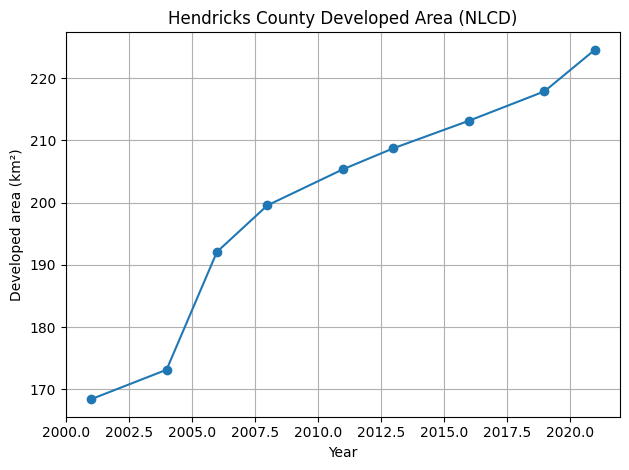

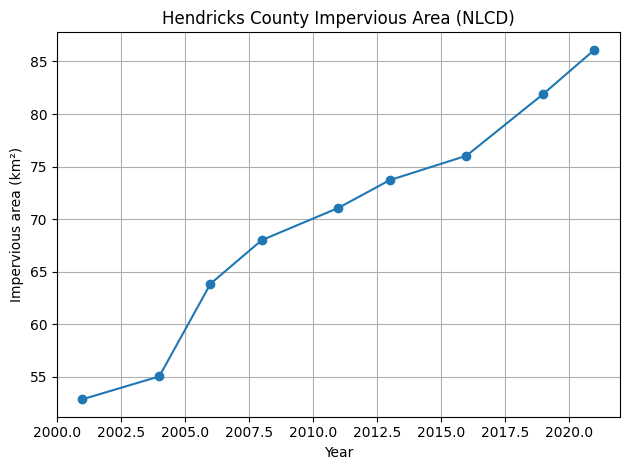

Saved: outputs/developed_area_over_time.png
Saved: outputs/impervious_area_over_time.png


In [13]:
import matplotlib.pyplot as plt

# Ensure sorted
df = df.sort_values("year")

# Chart 1: Developed area over time
plt.figure()
plt.plot(df["year"], df["developed_km2"], marker="o")
plt.xlabel("Year")
plt.ylabel("Developed area (km²)")
plt.title("Hendricks County Developed Area (NLCD)")
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/developed_area_over_time.png", dpi=200)
plt.show()

# Chart 2: Impervious area over time
plt.figure()
plt.plot(df["year"], df["impervious_km2"], marker="o")
plt.xlabel("Year")
plt.ylabel("Impervious area (km²)")
plt.title("Hendricks County Impervious Area (NLCD)")
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/impervious_area_over_time.png", dpi=200)
plt.show()

print("Saved: outputs/developed_area_over_time.png")
print("Saved: outputs/impervious_area_over_time.png")

In [14]:
base = df[df["year"] == 2001].iloc[0]
last = df[df["year"] == 2021].iloc[0]

dev_abs = float(last["developed_km2"] - base["developed_km2"])
imp_abs = float(last["impervious_km2"] - base["impervious_km2"])

summary = {
    "Developed area 2001 (km²)": float(base["developed_km2"]),
    "Developed area 2021 (km²)": float(last["developed_km2"]),
    "Developed area change (km²)": dev_abs,
    "Developed area change (%)": float(last["developed_pct_change_vs_2001"]),
    "Impervious area 2001 (km²)": float(base["impervious_km2"]),
    "Impervious area 2021 (km²)": float(last["impervious_km2"]),
    "Impervious area change (km²)": imp_abs,
    "Impervious area change (%)": float(last["impervious_pct_change_vs_2001"]),
}
summary


{'Developed area 2001 (km²)': 168.42663176470592,
 'Developed area 2021 (km²)': 224.57079529411754,
 'Developed area change (km²)': 56.14416352941163,
 'Developed area change (%)': 33.33449285374638,
 'Impervious area 2001 (km²)': 52.884590576470615,
 'Impervious area 2021 (km²)': 86.1063123176471,
 'Impervious area change (km²)': 33.22172174117648,
 'Impervious area change (%)': 62.81928512453583}

In [15]:
import requests

# New development = Developed in 2021 AND not developed in 2001
new_dev = dev2021.unmask(0).And(dev2001.unmask(0).Not()).selfMask()

def save_thumbnail_png(ee_img, vis, filename, region_geom, dims=1400):
    url = ee_img.clip(region_geom).getThumbURL({
        "region": region_geom,
        "dimensions": dims,
        **vis
    })
    r = requests.get(url, timeout=60)
    r.raise_for_status()
    with open(filename, "wb") as f:
        f.write(r.content)
    print("Saved:", filename)

save_thumbnail_png(
    new_dev,
    {"min": 0, "max": 1, "palette": ["00ff00"], "format": "png"},
    "outputs/new_development_2001_2021.png",
    region
)


Saved: outputs/new_development_2001_2021.png
